In [60]:
__author__ = "730466197"

## Hypothesis: I think that students who think the class is difficult will be less interested in the course topics.

In [61]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled.")

Autoreload of imported modules enabled.


First, I need to convert the data into a column-oriented data table.

In [62]:
from data_utils import read_csv_rows, columnar
data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

Now I will select just the column section of both the interest question and the difficulty question. Each is rated on a scale of 1-7. Here are the first five rows of each:

In [63]:
from data_utils import head, select
subset_interest: dict[str, list[str]] = select(columns, ["interesting"])
subset_difficulty: dict[str, list[str]] = select(columns, ["difficulty"])
print(head(subset_interest, 5))
head(subset_difficulty, 5)

{'interesting': ['5', '7', '7', '5', '6']}


{'difficulty': ['5', '3', '5', '6', '4']}

Next I will determine how many people think the course is hard. For this analysis, I will say that a rating of 6 or above is considered difficult, while 3-5 is average and 1-2 is easy. Here is the amount of responses for each difficulty level.

In [64]:
from data_utils import count, column_values
values: list[str] = column_values(data_rows, "difficulty")
difficulties: dict[str, int] = count(values)
ratings: dict[str, int] = {}
h: int = 0
avg: int = 0
e: int = 0
for num in difficulties:
    if int(num) > 6:
        h += difficulties[num]
        ratings["hard"] = h
    if int(num) < 6 and int(num) > 2:
        avg += difficulties[num]
        ratings["average"] = avg
    else:
        e += difficulties[num]
        ratings["easy"] = e
ratings

{'average': 332, 'easy': 241, 'hard': 86}

### Here is a barplot showing how the thoughts of respondants on difficulty compare. 

Text(0.5, 1.0, 'Respondants Thoughts on Course Difficulty')

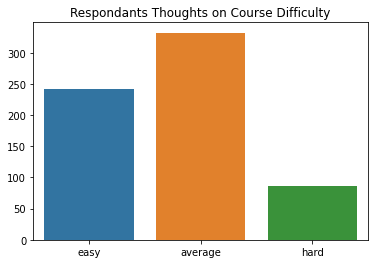

In [65]:
import seaborn
seaborn.barplot(x=["easy", "average", "hard"], y=[241, 332, 86]).set_title("Respondants Thoughts on Course Difficulty")

Next I will determine the interest levels of those taking the course. I will say that anything below a below a 3 is deemed not interested in the course topics, above a 5 is interested, and 3-5 is average interest. Using this, I can determine what portion of respondants thought the course was both hard and uninteresting. Here is the result:

In [66]:
from data_utils import high, average, low
interest_levels: dict[str, int] = {}
interest_levels["interested"] = high(subset_interest["interesting"])
interest_levels["average_interest"] = average(subset_interest["interesting"])
interest_levels["uninterested"] = low(subset_interest["interesting"])
interest_levels


{'interested': 356, 'average_interest': 198, 'uninterested': 19}

### Here is a barplot showing how the thoughts of respondants on interest compare. 

Text(0.5, 1.0, 'Interest of Respondants')

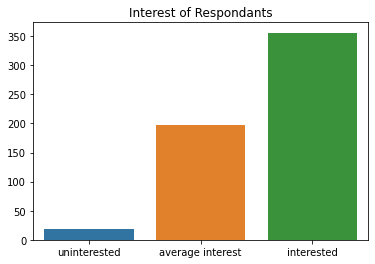

In [67]:
seaborn.barplot(x=["uninterested", "average interest", "interested"], y=[19, 198, 356]).set_title("Interest of Respondants")


Finally, I will determine how many respondants felt that the course is both difficult and uninteresting. Here are the results:

In [68]:
i = 0
students = 0

while i < len(subset_difficulty["difficulty"]):
    if int(subset_difficulty["difficulty"][i]) > 5 and int(subset_interest["interesting"][i]) < 3:
        students += 1
    i += 1
print(f"{students} students found the course to be both difficult and uninteresting.")

14 students found the course to be both difficult and uninteresting.


## Conclusion

### Out of the 86 students who thought that the course was hard, 14 of these students thought that the coursework was uninteresting, or about 16%. However, considering that only 19 individuals responded that the class was uninteresting, that means that about 74% of those who were actually uninterested in the coursework also thought that it was hard. So while my original hypthosis has been disproved, my project has, in the process, proved that those who find the class uninteresting tend to also find it hard.